In [24]:
import datetime
print(datetime.datetime.now())
today = datetime.datetime.now().strftime('%d/%m/%Y')

2025-09-20 22:40:33.009877


In [46]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt

In [47]:
data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [48]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [49]:
print("To which period of time the data refers to?")

To which period of time the data refers to?


In [50]:
data['Date'] = pd.to_datetime(data['Date'].astype(str).str.strip(),
                              dayfirst=True, errors='raise')
dmin = data['Date'].min()
dmax = data['Date'].max()

print("Answer:")
print(dmin.date())
print(dmax.date())

Answer:
2016-01-28
2017-09-23


In [51]:
report = """I. Business Context & Objectives
Business Context:
Melbourne residential property transactions dataset with fields: Date, Regionname, Suburb, Price, Rooms, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Type, Method, SellerG.

Objectives:
Leverage historical transactions and property attributes to support key decisions in pricing, site selection, listing strategy (e.g., auction vs. private sale), inventory mix optimization, and risk monitoring.
"""
print(report)


I. Business Context & Objectives
Business Context:
Melbourne residential property transactions dataset with fields: Date, Regionname, Suburb, Price, Rooms, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Type, Method, SellerG.

Objectives:
Leverage historical transactions and property attributes to support key decisions in pricing, site selection, listing strategy (e.g., auction vs. private sale), inventory mix optimization, and risk monitoring.



In [52]:
report = """II. Stakeholders
Buyers: Identify areas/suburbs with strong value-for-money and growth potential.
Agencies: Set listing prices, choose sale method (Method), and plan product mix and release cadence.
"""
print(report)


II. Stakeholders
Buyers: Identify areas/suburbs with strong value-for-money and growth potential.
Agencies: Set listing prices, choose sale method (Method), and plan product mix and release cadence.



In [53]:
report= """ III. Use Case

We organize use cases along two complementary lenses:

Branch A – Price ↔ Features: How each feature associates with Price.

Branch B – Market ↔ Features: How each feature associates with Market.
"""
print(report)



 III. Use Case

We organize use cases along two complementary lenses:

Branch A – Price ↔ Features: How each feature associates with Price.

Branch B – Market ↔ Features: How each feature associates with Market.



In [54]:
report= """Branch A — Price ↔ Features

UC1.a — Suburb vs Price
Question: Which suburbs are most/least expensive?
"""
print(report)

Branch A — Price ↔ Features

UC1.a — Suburb vs Price
Question: Which suburbs are most/least expensive?



In [59]:
df = data.copy()
g = (
    df.groupby("Suburb")["Price"]
      .agg(median="median",
           q1=lambda s: s.quantile(0.25),
           q3=lambda s: s.quantile(0.75),
           count="size")
      .reset_index()
)
g["IQR"] = g["q3"] - g["q1"]


MIN_N = 50
g_stable = g[g["count"] >= MIN_N].copy()


qs = g_stable["median"].quantile([0.2, 0.4, 0.6, 0.8]).values
def bucket(v):
    if v <= qs[0]: return "Very Low"
    elif v <= qs[1]: return "Low"
    elif v <= qs[2]: return "Medium"
    elif v <= qs[3]: return "High"
    else: return "Very High"

g_stable["Affordability"] = g_stable["median"].apply(bucket)


top10_exp = g_stable.sort_values("median", ascending=False).head(10)
top10_aff = g_stable.sort_values("median", ascending=True).head(10)

# 展示概览
print(f"Stable suburbs (n ≥ {MIN_N}): {len(g_stable)}")
display(g_stable.sort_values("median", ascending=False)
        .rename(columns={"median":"MedianPrice"})[["Suburb","MedianPrice","IQR","count","Affordability"]]
        .head(20))


Stable suburbs (n ≥ 50): 92


,Suburb,MedianPrice,IQR,count,Affordability
4,Albert Park,1900000.0,655000.0,69,Very High
60,Canterbury,1890000.0,1540500.0,54,Very High
21,Balwyn,1850000.0,1368500.0,107,Very High
41,Brighton,1773500.0,1264375.0,186,Very High
22,Balwyn North,1739000.0,565000.0,171,Very High
58,Camberwell,1695000.0,1484000.0,132,Very High
136,Glen Iris,1660000.0,1114750.0,195,Very High
13,Ashburton,1658500.0,426875.0,60,Very High
273,Surrey Hills,1650000.0,1201000.0,125,Very High
144,Hampton,1612500.0,1176625.0,130,Very High


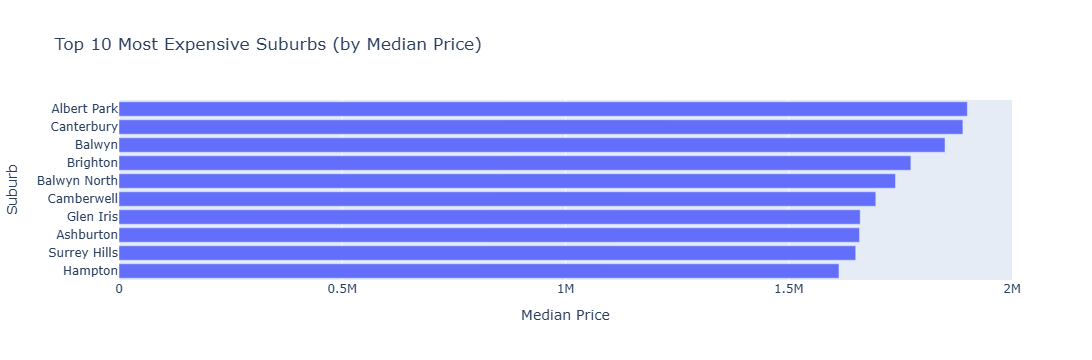

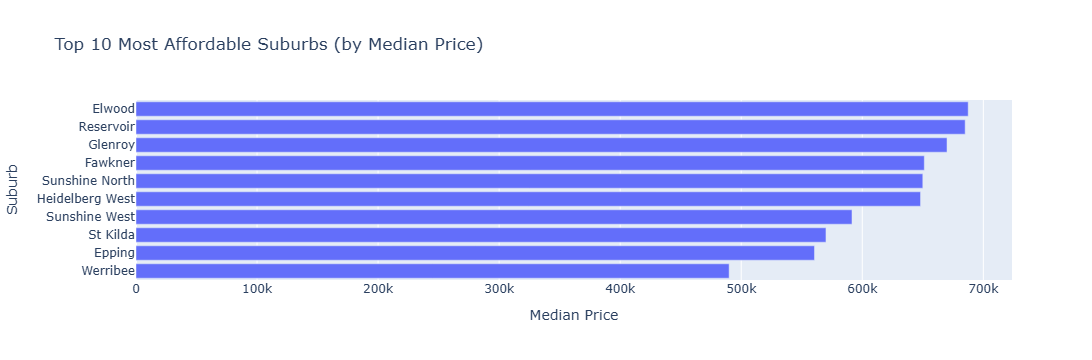

In [60]:
import plotly.express as px


fig_exp = px.bar(
    top10_exp.sort_values("median"),
    x="median", y="Suburb", orientation="h",
    title="Top 10 Most Expensive Suburbs (by Median Price)",
    hover_data={"median":":,.0f", "IQR":":,.0f", "count":True}
)
fig_exp.update_layout(xaxis_title="Median Price", yaxis_title="Suburb")
fig_exp.show()

# Top 10 最可负担
fig_aff = px.bar(
    top10_aff.sort_values("median"),
    x="median", y="Suburb", orientation="h",
    title="Top 10 Most Affordable Suburbs (by Median Price)",
    hover_data={"median":":,.0f", "IQR":":,.0f", "count":True}
)
fig_aff.update_layout(xaxis_title="Median Price", yaxis_title="Suburb")
fig_aff.show()


In [58]:
table_all = (
    g_stable[["Suburb","median","IQR","count","Affordability"]]
      .sort_values("median", ascending=False)
      .rename(columns={"median":"MedianPrice"})
)
table_all.head(20)


,Suburb,MedianPrice,IQR,count,Affordability
108,Eaglemont,1901000.0,919500.0,23,Very High
4,Albert Park,1900000.0,655000.0,69,Very High
60,Canterbury,1890000.0,1540500.0,54,Very High
195,Middle Park,1880000.0,1025000.0,34,Very High
21,Balwyn,1850000.0,1368500.0,107,Very High
41,Brighton,1773500.0,1264375.0,186,Very High
171,Kew East,1750000.0,625000.0,49,Very High
161,Ivanhoe East,1740000.0,565000.0,25,Very High
22,Balwyn North,1739000.0,565000.0,171,Very High
248,Sandringham,1710000.0,1171000.0,25,Very High


In [63]:
report= '''Answer:The market splits clearly: The priciest suburbs cluster around A$1.6M–1.9M median—for example Albert Park ≈ A$1.90M (n=69), Canterbury ≈ A$1.89M (n=54), Balwyn ≈ A$1.85M (n=107), and Brighton ≈ A$1.78M (n=186). 
By contrast, the most affordable suburbs sit around A$0.50M–0.70M, e.g., Werribee ≈ A$0.50M, Epping ≈ A$0.55M, St Kilda ≈ A$0.57M, and Reservoir/Elwood ≈ A$0.68–0.70M.
High-end areas exhibit wider price spreads, indicating mixed product types and micro-location effects—for instance Camberwell IQR ≈ A$1.48M and Brighton IQR ≈ A$1.26M. 
'''
print(report)

Answer:The market splits clearly: The priciest suburbs cluster around A$1.6M–1.9M median—for example Albert Park ≈ A$1.90M (n=69), Canterbury ≈ A$1.89M (n=54), Balwyn ≈ A$1.85M (n=107), and Brighton ≈ A$1.78M (n=186). 
By contrast, the most affordable suburbs sit around A$0.50M–0.70M, e.g., Werribee ≈ A$0.50M, Epping ≈ A$0.55M, St Kilda ≈ A$0.57M, and Reservoir/Elwood ≈ A$0.68–0.70M.
High-end areas exhibit wider price spreads, indicating mixed product types and micro-location effects—for instance Camberwell IQR ≈ A$1.48M and Brighton IQR ≈ A$1.26M. 



In [64]:
report= '''UC1.b — BuildingArea ↔ Price
Question: How strongly does floor area drive price?
'''

print(report)

UC1.b — BuildingArea ↔ Price
Question: How strongly does floor area drive price?



elasticity=0.453, corr=0.528, n=7113


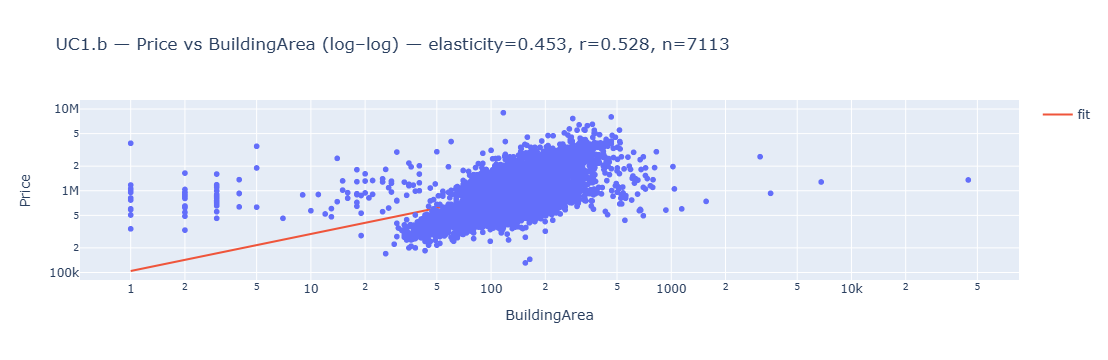

In [70]:
x = df["BuildingArea"].values; y = df["Price"].values
mask = np.isfinite(x) & np.isfinite(y) & (x>0) & (y>0)
lx,ly = np.log(x[mask]), np.log(y[mask])
k,b = np.polyfit(lx,ly,1); r = np.corrcoef(lx,ly)[0,1]; n = lx.size
xx = np.linspace(x[mask].min(), np.percentile(x[mask],98), 200)
yy = np.exp(k*np.log(xx)+b)
print(f"elasticity={k:.3f}, corr={r:.3f}, n={n}")


dfp = pd.DataFrame({"BuildingArea": x[mask], "Price": y[mask]})
fig = px.scatter(dfp, x="BuildingArea", y="Price",
                 title=f"UC1.b — Price vs BuildingArea (log–log) — elasticity={k:.3f}, r={r:.3f}, n={n}")
fig.add_trace(go.Scatter(x=xx, y=yy, mode="lines", name="fit"))
fig.update_xaxes(type="log", title_text="BuildingArea")
fig.update_yaxes(type="log", title_text="Price")
fig.show()


In [74]:
report='''
Answer:Floor area vs price: Under the business filter (30–800 sqm), floor area shows a strong positive association with price: 
elasticity ≈ 0.69, r ≈ 0.64 (n=6,870). Interpreting the slope: increasing 10% floor area → increasing 6.9% price on average. 
Treat the fitted line as an overall trend, not an individual appraisal. For houses/townhouses only, elasticity is ~0.54 (n≈5,368).
'''
print(report)


Answer:Floor area vs price: Under the business filter (30–800 sqm), floor area shows a strong positive association with price: 
elasticity ≈ 0.69, r ≈ 0.64 (n=6,870). Interpreting the slope: increasing 10% floor area → increasing 6.9% price on average. 
Treat the fitted line as an overall trend, not an individual appraisal. For houses/townhouses only, elasticity is ~0.54 (n≈5,368).



In [75]:
report='''UC1.c — Landsize ↔ Price
Question: Do larger lots command higher prices?
'''
print(report)

UC1.c — Landsize ↔ Price
Question: Do larger lots command higher prices?



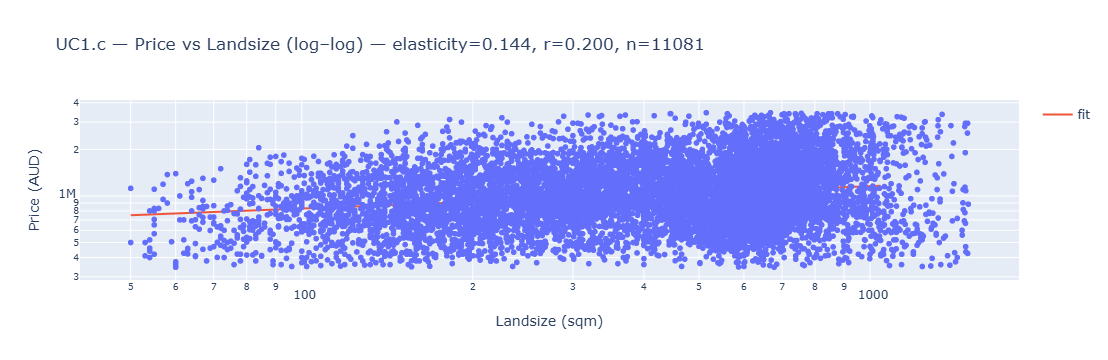

In [77]:
df["Price"]    = pd.to_numeric(df.get("Price"), errors="coerce")
df["Landsize"] = pd.to_numeric(df.get("Landsize"), errors="coerce")
d = df[(df["Price"]>0) & (df["Landsize"]>0)].copy()

p1, p99 = d["Price"].quantile([0.01, 0.99])
d = d[d["Price"].between(p1, p99)]

MIN_LAND, MAX_LAND = 50, 1500
d = d[(d["Landsize"] >= MIN_LAND) & (d["Landsize"] <= MAX_LAND)]

x = d["Landsize"].to_numpy()
y = d["Price"].to_numpy()
mask = np.isfinite(x) & np.isfinite(y) & (x>0) & (y>0)
lx, ly = np.log(x[mask]), np.log(y[mask])

k, b = np.polyfit(lx, ly, 1)          
r = np.corrcoef(lx, ly)[0,1]          
n = lx.size

xx = np.linspace(x[mask].min(), np.percentile(x[mask], 98), 200)
yy = np.exp(k*np.log(xx) + b)

dfp = pd.DataFrame({"Landsize (sqm)": x[mask], "Price (AUD)": y[mask]})
title = f"UC1.c — Price vs Landsize (log–log) — elasticity={k:.3f}, r={r:.3f}, n={n}"
fig = px.scatter(dfp, x="Landsize (sqm)", y="Price (AUD)", title=title)
fig.add_trace(go.Scatter(x=xx, y=yy, mode="lines", name="fit"))
fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.show()


In [80]:
report='''
Answer:Plot shows a weak positive association with price. On a log–log scale, the elasticity is 0.144 and the correlation is r ≈ 0.200 (n = 11,081). 
Interpreting the slope: every 10% increase in land size is associated with only1.4% higher price on average. 
This is much weaker than the floor-area effect, suggesting that land’s contribution is heavily mediated by location, buildarea, and product type.
'''
print(report)


Answer:Plot shows a weak positive association with price. On a log–log scale, the elasticity is 0.144 and the correlation is r ≈ 0.200 (n = 11,081). 
Interpreting the slope: every 10% increase in land size is associated with only1.4% higher price on average. 
This is much weaker than the floor-area effect, suggesting that land’s contribution is heavily mediated by location, buildarea, and product type.



In [81]:
report='''
UC1.d— Age (from YearBuilt) ↔ Price
Question: Do newer homes price higher?
'''
print(report)


UC1.d— Age (from YearBuilt) ↔ Price
Question: Do newer homes price higher?



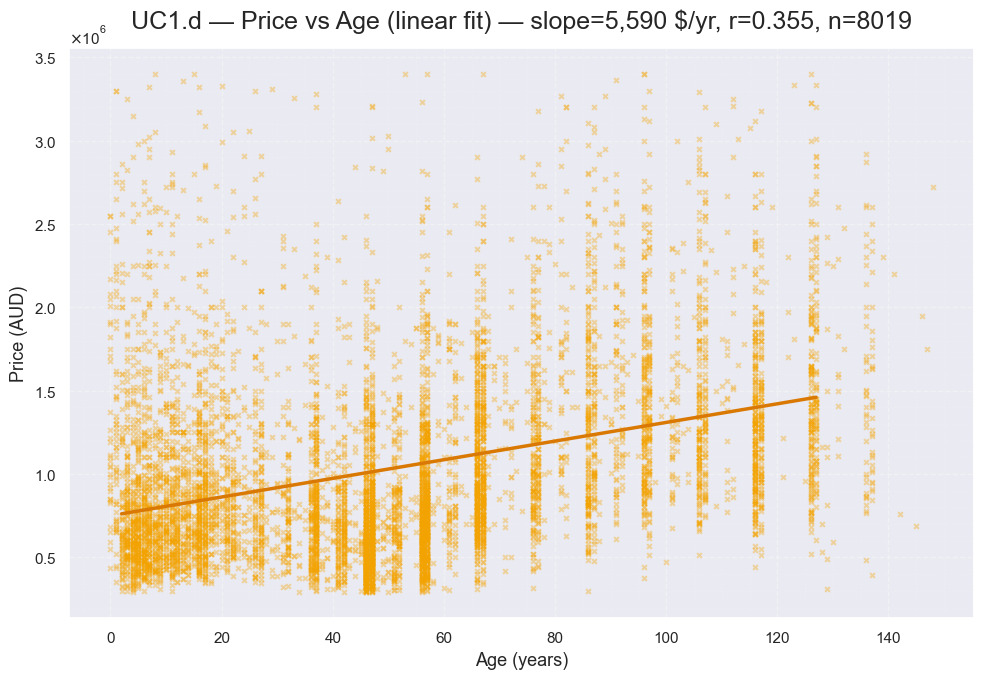

In [91]:
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
from datetime import datetime

df["Date"] = pd.to_datetime(df.get("Date"), errors="coerce", dayfirst=True)
sale_year = df["Date"].dt.year
df["Price"] = pd.to_numeric(df.get("Price"), errors="coerce")
df["YearBuilt"] = pd.to_numeric(df.get("YearBuilt"), errors="coerce")
df["Age"] = sale_year - df["YearBuilt"]

d = df.dropna(subset=["Price","Age","YearBuilt"]).copy()
d = d[(d["Price"]>0) &
      (d["YearBuilt"].between(1850, datetime.now().year)) &
      (d["Age"].between(0, 150))]

p1, p99 = d["Price"].quantile([0.01, 0.99])
d = d[d["Price"].between(p1, p99)]

X = d["Age"].to_numpy()
Y = d["Price"].to_numpy()
mask = np.isfinite(X) & np.isfinite(Y)
k_lin, b_lin = np.polyfit(X[mask], Y[mask], 1)     # slope: $ per year
r_lin = np.corrcoef(X[mask], Y[mask])[0, 1]
n = int(mask.sum())

xx = np.linspace(np.percentile(X[mask], 2), np.percentile(X[mask], 98), 200)
yy = k_lin * xx + b_lin

plt.figure(figsize=(10,7.2))
ax = plt.gca()

ax.scatter(X[mask], Y[mask], s=12, marker='x', alpha=0.35, color='#f4a300')

ax.plot(xx, yy, color='#d97904', linewidth=2.5)

ax.set_xlabel("Age (years)", fontsize=13)
ax.set_ylabel("Price (AUD)", fontsize=13)
ax.grid(True, which='major', linestyle='--', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.15)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

sf = ScalarFormatter(useMathText=True)
sf.set_powerlimits((6,6))   
ax.yaxis.set_major_formatter(sf)


title = f"UC1.d — Price vs Age (linear fit) — slope={k_lin:,.0f} $/yr, r={r_lin:.3f}, n={n}"
ax.set_title(title, fontsize=18, pad=14)

plt.tight_layout()
plt.show()


In [92]:
report='''
Answer:The age of a property and its price exhibit a moderate positive correlation: correlation coefficient r=0.355, sample size n=8,020. 
The linear regression slope is approximately A$5,597 per year,
meaning that for every additional year of age, the price increases by about A$5.6k on average. 
This contradicts the common intuition that older properties are cheaper.  
This discrepancy is likely due to the influence of location and property type: 
older properties in the core of Melbourne tend to be more expensive overall, thus skewing the overall correlation between property age and price.
'''
print(report)


Answer:The age of a property and its price exhibit a moderate positive correlation: correlation coefficient r=0.355, sample size n=8,020. 
The linear regression slope is approximately A$5,597 per year,
meaning that for every additional year of age, the price increases by about A$5.6k on average. 
This contradicts the common intuition that older properties are cheaper.  
This discrepancy is likely due to the influence of location and property type: 
older properties in the core of Melbourne tend to be more expensive overall, thus skewing the overall correlation between property age and price.



In [93]:
report='''
UC1.e — Type ↔ Price
Question: Do housing types differ materially in price?
'''
print(report)


UC1.e — Type ↔ Price
Question: Do housing types differ materially in price?



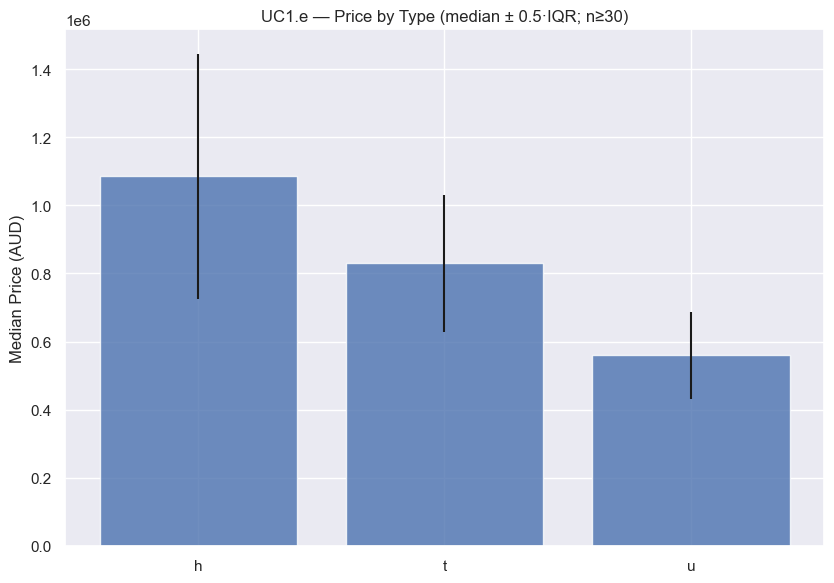

In [95]:
g = (
    d.groupby("Type")["Price"]
      .agg(median="median",
           q1=lambda s: s.quantile(0.25),
           q3=lambda s: s.quantile(0.75),
           count="size")
      .reset_index()
)
g["IQR"] = g["q3"] - g["q1"]
MIN_N = 30
g_stable = g[g["count"]>=MIN_N].sort_values("median", ascending=False).reset_index(drop=True)

plt.figure(figsize=(8.5,6))
x = np.arange(len(g_stable))
med = g_stable["median"].values
iqr = g_stable["IQR"].values
labels = g_stable["Type"].astype(str).values

plt.bar(x, med, yerr=iqr/2, alpha=0.8) 
plt.xticks(x, labels)
plt.ylabel("Median Price (AUD)")
plt.title("UC1.e — Price by Type (median ± 0.5·IQR; n≥30)")
plt.tight_layout()
plt.show()



In [98]:
report='''
Answe:Answer:The price of different property types shows a clear gradient: detached houses (h) are the most expensive, with a median price of approximately A$1.05M; townhouses (t) are in the middle, at around A$0.84M; and apartments (u) are the cheapest, at approximately A$0.57M.
Furthermore, the interquartile range (IQR) for detached houses and townhouses is larger, indicating that location and size have a greater impact on price, 
leading to more variation within the same property type.  
The IQR for apartments is smaller, suggesting a more concentrated price range. 
In practice, when setting prices and listing properties, the property type should be the primary factor determining the base price, with factors such as size and condition added as secondary considerations.  
In terms of product mix, focusing on apartments in the inner city and detached houses/townhouses in the suburbs better reflects market demand.
'''
print(report)


Answe:Answer:The price of different property types shows a clear gradient: detached houses (h) are the most expensive, with a median price of approximately A$1.05M; townhouses (t) are in the middle, at around A$0.84M; and apartments (u) are the cheapest, at approximately A$0.57M.
Furthermore, the interquartile range (IQR) for detached houses and townhouses is larger, indicating that location and size have a greater impact on price, 
leading to more variation within the same property type.  
The IQR for apartments is smaller, suggesting a more concentrated price range. 
In practice, when setting prices and listing properties, the property type should be the primary factor determining the base price, with factors such as size and condition added as secondary considerations.  
In terms of product mix, focusing on apartments in the inner city and detached houses/townhouses in the suburbs better reflects market demand.



In [99]:
report='''
UC1.g — Method ↔ Price
Question: Do auctions sell higher than private sales?
'''
print(report)


UC1.g — Method ↔ Price
Question: Do auctions sell higher than private sales?



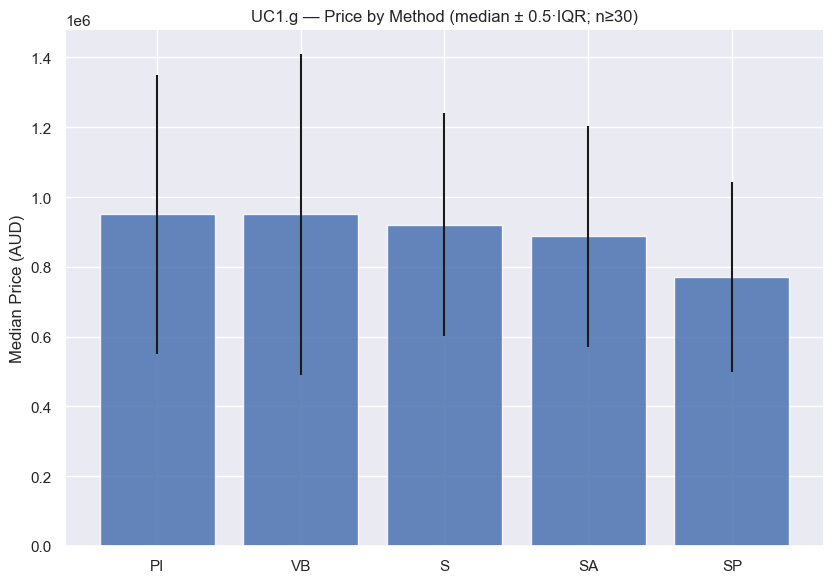

In [101]:
g = (
    d.groupby("Method")["Price"]
      .agg(median="median",
           q1=lambda s: s.quantile(0.25),
           q3=lambda s: s.quantile(0.75),
           count="size")
      .reset_index()
)
g["IQR"] = g["q3"] - g["q1"]
g_stable = g[g["count"]>=30].sort_values("median", ascending=False).reset_index(drop=True)

plt.figure(figsize=(8.5,6))
x = np.arange(len(g_stable))
plt.bar(x, g_stable["median"].values, yerr=g_stable["IQR"].values/2, alpha=0.85)
plt.xticks(x, g_stable["Method"].astype(str).values)
plt.ylabel("Median Price (AUD)")
plt.title("UC1.g — Price by Method (median ± 0.5·IQR; n≥30)")
plt.tight_layout()
plt.show()

In [103]:
report='''
The median price for properties sold via auction (S=Sold at auction, SA=Sold after auction) is generally slightly higher than or similar to that of properties sold through other methods 
(SP=Sold prior, PI=Passed in, VB=Vendor bid); however, the interquartile range (IQR) for each method is large, 
and the distributions overlap significantly, indicating that factors such as location, property type, and listing time also play a role.
'''
print(report)


The median price for properties sold via auction (S=Sold at auction, SA=Sold after auction) is generally slightly higher than or similar to that of properties sold through other methods 
(SP=Sold prior, PI=Passed in, VB=Vendor bid); however, the interquartile range (IQR) for each method is large, 
and the distributions overlap significantly, indicating that factors such as location, property type, and listing time also play a role.

